
# 비교, 마스크, 부울 로직(Comparisons, Masks and Boolean Logic)

- **목적**
  - 배열내의 값을 검사하고 조작하는데 부울 마스크를 사용함
  - 마스킹은 특정 기준에 따라 배열 값을 추출, 계산, 조작 함
  - 이상치를 제거 할 수 있음

#### [비교 연산자 UFuncs]

| Operator	    | Equivalent ufunc    |
|---------------|---------------------|
|``==``         |``np.equal``         |
|``!=``         |``np.not_equal``     |
|``<``          |``np.less``          |
|``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       |
|``>=``         |``np.greater_equal`` |

#### [요소수 세기 UFuncs]
- np.count_nonzero
- np.sum
- np.any
- np.all

#### [비트단위의 부울 연산자 UFuncs]

| Operator	    | Equivalent ufunc    |
|---------------|---------------------|
|``&``          |``np.bitwise_and``   |
|&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   |
|``~``          |``np.bitwise_not``   |

#### [마스크로서 부울 배열]
- 마스킹연산


#### [and / or (키워드) 와 & / | (비트연산자) 의 차이 
- and/or 키워드는 전체 객체의 참과 거짓을 다룸
- & / | 비트연산자는 각 객체의 비트를 참조 

###### 예) 시애틀 2014년 비온 날 세기 

In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [11]:
print(rainfall)
print("\n")
print(inches)

[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13   0  30   0   

* 비가 내린 양 히스토그램

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

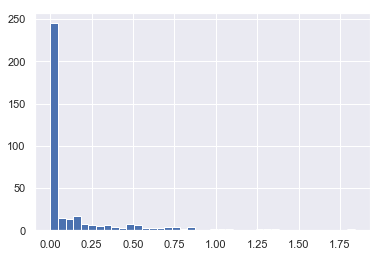

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches,40)

* 히스토그램에서 비가 얼마나 내리는지 알수 있지만 비가 몇일 오는지 알수가 없음

* 365일 데이터를 루프를 돌면서 비가 내린날을 카운트를 하는것은 사실상 비효율적이며 표본이 많아질경우 비효율적임
* 그래서 UFuncs 를 이용하여 비교 할 수 있음 => 마스킹

* **UFuncs를 이용하여 비교 연산자 ( < : 보다 작음 , > : 보다 큼 )를 비교 결과는 항상 Boolean 타입 임**

###### 예) 비교 연산 1

In [13]:
# 비교 연산을 위한 배열 선언
x = np.array([1,2,3,4,5])
# UFuncs를 이용한 비교 연산
print(x<3)

[ True  True False False False]


* 비교 연산자를 사용한 결과는 Boolean 타입의 배열이 나옴

###### 예) 비교 연산 2

In [14]:
# 두 배열의 항목 비교
a = x * 2
b = x ** 2
print("a : ", a)
print("b : ", b)

a :  [ 2  4  6  8 10]
b :  [ 1  4  9 16 25]


In [15]:
# For(루프)문을 이용하여 각각의 데이터를 접근하여 비교하지 않고 UFuncs를 이용하여 비교 연산을 함
print(a == b)

[False  True False False False]


* a, b 배열의 1번째 인덱스의 값이 4로 동일 하기 때문에 Boolean 형 결과 배열의 1번째 인덱스만 True가 됨

## [비교 연산자 UFuncs]

| Operator	    | Equivalent ufunc    |
|---------------|---------------------|
|``==``         |``np.equal``         |
|``!=``         |``np.not_equal``     |
|``<``          |``np.less``          |
|``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       |
|``>=``         |``np.greater_equal`` |

## [요소 수 세기 UFuncs]
- np.count_nonzero
- np.sum
- np.any
- np.all

###### 예) 비교연산 3

In [19]:
rng = np.random.RandomState(0)
print(type(rng))

x = rng.randint(10, size=(3, 4))
print(x)

<class 'mtrand.RandomState'>
[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [20]:
# 2차원 배열의 비교 연산
print( x < 6)

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


* 결과는 비교 대상 배열의 형태로 Boolean 형태로 나옴

### Boolean 배열에서 True의 개수를 세는 방법 : np.count_nonzero, np.sum 사용
- `numpy.count_nonzero(a, axis=None)`
  - a : Boolean 배열
  - True : 1, False : 0의 값을 가지고 있음
  - np.count_nonzero 는 0이 아닌 값을 셈
- `numpy.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>)`

In [26]:
print("True value : ",True.real)
print("False value : ",False.real)

True value :  1
False value :  0


###### 예) Boolean 배열에서  True 개수 확인 (np.count_nonzero 사용)

In [21]:
print(x)
print("\n")
x_bool = x < 6
print(x_bool)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


In [27]:
print("True count : ",np.count_nonzero(x_bool))

True count :  8


###### 예) Boolean 배열에서  True 개수 확인 (np.sum 사용)

In [34]:
print(x_bool)

# boolean 배열의 총합을 구하는 것임, True(1) False(0) 으로 데이터가 구성되어 있기 때문에 True의 갯수로 판단 할 수 있음
print("Sum Value of True ",np.sum(x_bool)

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


8

* np.sum(a,axis=0) : 배열의 열의 True 개수 확인
* np.sum(a,axis=1) : 배열의 행의 True 개수 확인

In [36]:
print("열(axis=0)의 True 수 : ",np.sum(x_bool,axis=0))
print("행(axis=1)의 True 수 : ",np.sum(x_bool,axis=1))

열(axis=0)의 True 수 :  [2 2 2 2]
행(axis=1)의 True 수 :  [4 2 2]


### 그 밖의 요소 수 세기
- np.any
  - `numpy.any(a, axis=None, out=None, keepdims=<no value>)`
    - a : Boolean 배열
    - True 요소가 하나라도 있는지 알려주며 결과는 Boolean 값(True, False)
- np.all
  - `numpy.all(a, axis=None, out=None, keepdims=<no value>)`
    - a : Boolean 배열
    - 모든 요소가 True 인지 알려주며, 결과는 Boolean 값(True, False)
- axis 파라미터를 이용하여 열(axis=0)과 행(axis=1)의 True 요소를 확인 가능

###### 예) np.any, np.all

In [45]:
print(x)
print(x_bool)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]
[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


In [46]:
print(np.any(x_bool))

True


In [47]:
print(np.all(x < 10))

True


* **python 내장 함수의 sum(), any(), all() 함수와 다차원 배열상에서는 다를 수 있으니 주의!!**

## [비트단위의 부울 연산자 UFuncs]

| Operator	    | Equivalent ufunc    |
|---------------|---------------------|
|``&``          |``np.bitwise_and``   |
|&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   |
|``~``          |``np.bitwise_not``   |

* 비트 단위 연산자와 부울 연산자를 이용하여 원하는 조건의 항목을 비교 할 수 있음

###### 예) 0.5~1인치 비가 내린 날 세기

In [49]:
# 조건 A 와 B 모두 만족하는 항목 수 => A and B 
result = np.sum((inches > 0.5) & (inches < 1.0))
print(result)

29


In [51]:
# 조건 A가 아니거나 B가 아닌 것들이 아닌것 => not(A or B)
result = np.sum(~((inches <= 0.5) | (inches >= 1.0)))
print(result)

29


* 위의 두가지 방법은 같은 값을 도출 해내는 집합관계임

###### 예) 기타 통계 수치 

In [52]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## [마스크로서의 부울 배열]

* **마스킹 연산** : 부울 배열을 마스크로 사용하여 데이터의 특정 부분 집합을 선택 할 수 있음 
* 마스킹 배열과 마스킹 할 배열의 shape은 동일 해야함

* step1) 일정 조건을 만족하는 마스크 생성

In [53]:
x_mask = x < 5
print(x_mask)

[[False  True  True  True]
 [False False  True False]
 [ True  True False False]]


* step2) 마스크와 동일한 shape 을 가지는 난수 배열 생성

In [68]:
np.random.seed(1)
arr = np.random.random(size=x_mask.shape) * 10
print(arr)

[[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00]
 [1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00]
 [3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00]]


* step3) 마스킹 연산을 통해 특정 데이터를 추출할 배열의 인덱스에 마스크를 넣어서 마스킹 연산을 함

In [69]:
mask_result = arr[x_mask]
print(mask_result)

[7.20324493e+00 1.14374817e-03 3.02332573e+00 1.86260211e+00
 3.96767474e+00 5.38816734e+00]


* 결과) 마스크에 True로 된 부분의 인덱스의 값을 가져옴

- 마스크 값
<pre><code>
[[  False     *True*      *True*      *True**]
 [   False      False      *True*       False]
 [  *True*     *True*       False       False]]
</code></pre>
- 마스크 할 배열
<pre><code>
[[  4.17022005e+00   *7.20324493e+00*    *1.14374817e-03*    *3.02332573e+00*]
 [   1.46755891e+00    9.23385948e-01     *1.86260211e+00*     3.45560727e+00]
 [  *3.96767474e+00   *5.38816734e+00*     4.19194514e+00      6.85219500e+00]]
</code></pre>
- 마스킹한 결과
<pre><code>
[7.20324493e+00 1.14374817e-03 3.02332573e+00 1.86260211e+00
 3.96767474e+00 5.38816734e+00]
 </code></pre>

###### 예) 시애틀 비온날 마스킹을 이용한 통계치 계산

In [77]:
# construct a mask of all rainy days
rainy = (inches > 0)
print("\n")
print("rainy mask : \n", rainy)
print("\n")
# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)
print("\n")
print("summer mask : \n", summer)
print("\n")

# 2014년 평균 강우량 (중앙값)
print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
# 2014년 여름 평균 강우량 (중앙값)
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
# 2014년 여름 최대 강우량
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
# 2014년 여름을 제외한 평균 강우량
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))



rainy mask : 
 [False  True  True False False  True  True  True  True  True  True  True
 False False False False False False False False False  True False False
 False False False  True  True False  True  True False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
  True  True  True  True  True False  True  True  True False False  True
  True  True  True  True False  True False False False False False  True
  True  True  True  True False False False False  True False  True False
 False  True False False False False False False  True  True  True False
  True False  True  True  True  True False  True  True False False False
 False False  True  True  True False False  True  True  True False False
 False False False False False False False False False False  True False
  True False False False False False False False False False False False
 False False False False False Fal